In [ ]:
https://stackoverflow.com/questions/21133878/how-to-convert-data-from-an-excel-spreadsheet-to-a-suitable-representation-for-t

In [158]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install ipywidgets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
You should consider upgrading via the '/Users/lblachnicki/ml/my_env/bin/python3 -m pip install --upgrade pip' command.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
You should consider upgrading via the '/Users/lblachnicki/ml/my_env/bin/python3 -m pip install --upgrade pip' command.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

You should consider upgrading via the '/Users/lblachnicki/ml/my_env/bin/python3 -m pip install --upgrade pip' command.


• Familiarise yourself with the concept of supervised learning (regression, classification)
• Familiarise yourself with the concept of unsupervised learning (clustering)
• Design and implement a data preprocessing pipeline
• Select the regression method and perform experiments on the data
• Select the classification method and perform experiments on the data
• Select the clustering method and perform experiments on the data
• Modify the default parameter values in the methods and repeat the experiments

## Design and implement a data preprocessing pipeline

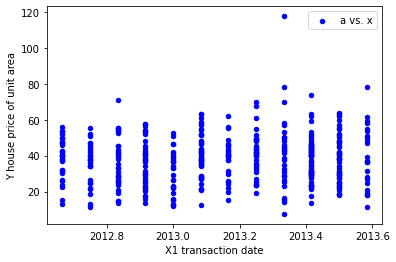

(414, 7) (414,)
(277, 7) (137, 7) (277,) (137,)
(272, 7) (272,)
MAE: 6.177


In [48]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
# https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

# read the data set
notebook_path = os.path.abspath("Solution.ipynb")
source_path = os.path.join(os.path.dirname(notebook_path), "datasets/regression/Real estate valuation data set.xlsx")
df = pd.read_excel(source_path,engine='openpyxl')

%matplotlib inline
import matplotlib.pyplot as plt

df.plot(kind="scatter", x="X1 transaction date",y="Y house price of unit area", color="b", label="a vs. x")
plt.show()

data = df.values

# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

# split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

In [26]:
# https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/

# contains decent steps
# https://github.com/collindching/Learning-Exercises/tree/master/Box%20Office%20Revenue%20Prediction

# todo use scatterplots to find and remove outliers
# todo standardize?

# nothing null, no need for IMPUTERS
print(np.where(pd.isnull(data)))

from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# separate X and Y values
train_x = data.drop(columns=['Y house price of unit area'])
train_y = data['Y house price of unit area']

pre_process = ColumnTransformer(
    remainder='passthrough',
    transformers=[('drop_columns', 'drop', ['No'])],
)

# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""
model_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])
# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

# predict target values on the training data
print(model_pipeline.predict(train_x))

# print(train_x)
# print(train_y)

(array([], dtype=int64), array([], dtype=int64))
[41.92607195 42.98181718 48.6785788  50.07301921 45.72775183 30.15897974
 38.69983736 47.24618489 19.42375    22.94735298 38.46678835 59.16936281
 40.24359173 24.31120742 34.1875     47.84545544 69.40325    37.70420806
 41.78470902 48.55206589 29.404575   52.47974755 25.72595451 51.10474846
 36.59995952 26.10069682 54.97237827 37.59359143 43.24960666 52.9031313
 21.70375    31.26179566 35.6622804  48.54006751 51.43590161 31.01
 23.440548   26.87059263 45.93780556 49.61561425 15.80899921 18.81585714
 34.78839471 37.45966333 52.07839594 37.91105348 41.37338589 52.22598595
 14.26400278 14.22286111 41.70615308 21.71224277 25.67913425 39.29204004
 51.1226926  13.87716667 39.91806214 54.6622289  21.80975    35.98324333
 23.53559688 60.31442927 26.35690312 52.37159594 25.26405841 50.78478795
 50.72903251 55.22274619 37.47332104 42.11415626 59.28508344 40.25555633
 40.84075326 17.36693849 53.00526148 28.79232814 40.92414913 25.24596929
 31.91662

# Classification

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [128]:
notebook_path = os.path.abspath("Solution.ipynb")

amazon_source_path = os.path.join(os.path.dirname(notebook_path), "datasets/classification/amazon_cells_labelled.txt")
imdb_source_path = os.path.join(os.path.dirname(notebook_path), "datasets/classification/imdb_labelled.txt")
yelp_source_path = os.path.join(os.path.dirname(notebook_path), "datasets/classification/yelp_labelled.txt")

datasets = {
    'amazon': pd.read_csv(amazon_source_path, delimiter='\t', header=None, names=["text","label"]),
    'imdb': pd.read_csv(imdb_source_path, delimiter='\t', header=None, names=["text","label"]),
    'yelp': pd.read_csv(yelp_source_path, delimiter='\t', header=None, names=["text","label"]),
}

for dataset in datasets:
    print(f"Dataset {str(dataset)}:")
    print("Shape: " + str(datasets[dataset].shape))
    print(datasets[dataset].head())
    print(datasets[dataset].info())
    print(datasets[dataset].describe())
    print("--------------------------------------------------\n")


Dataset amazon:
Shape: (1000, 2)
                                                text  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None
            label
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000
--------------------------------------------------

Dataset imdb:
Shape: (748, 2)
                                                text  labe

In [142]:
# merge datasets
datasets["amazon"]["source"] = 'amazon'
datasets["imdb"]["source"] = 'imdb'
datasets["yelp"]["source"] = 'yelp'

data = pd.concat(list(datasets.values()))

data.shape

(2748, 3)

<AxesSubplot:ylabel='source'>

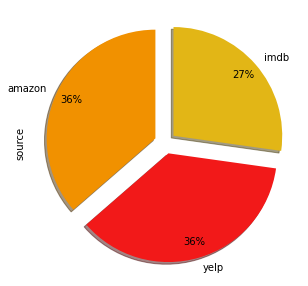

In [143]:
data['source'].value_counts().plot(kind='pie', 
                                   autopct='%1.0f%%',
                                   shadow=True, 
                                   startangle=90, 
                                   pctdistance=0.85,
                                   explode = (0.1,0.1,0.1),
                                   colors = ['#f19100','#f21919','#e2b616'],
                                   figsize=(5, 5))

<AxesSubplot:ylabel='label'>

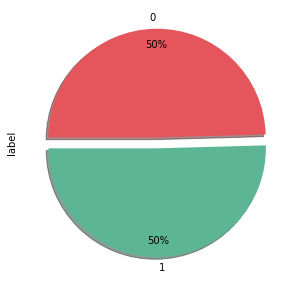

In [146]:
data.label.value_counts().plot(kind='pie', 
                                   autopct='%1.0f%%',
                                   shadow=True, 
                                   startangle=180, 
                                   pctdistance=0.85,
                                   explode = (0.05,0.05),
                                   colors = ['#5cb696','#e4565c'],
                                   figsize=(5, 5))

## Preprocessing

['This battery is an excellent bargain!'
 'Fantastic buy and will get again for whatever my next phone is'
 'I thought Errol Flynn was brilliant as Custer and has since become my favourite actor!  '
 ... 'They dropped more than the ball.'
 'For the price on Amazon, it is an excellent product, which I would highly recommend.'
 'Macbeth (Jason Connery) moved me to tears with his final monolog (out brief candle, out)He gave the sphere of moral decay and dark forces a human face, which makes it the more interesting.  ']


<AxesSubplot:ylabel='label'>

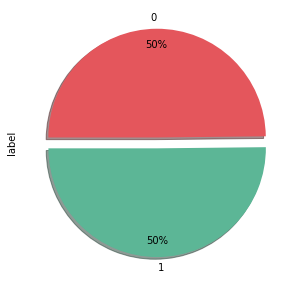

In [166]:
sentences = data['text'].values
y = data['label'].values

# diviser les données
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                    test_size=0.25, 
                                                                    random_state=1000, 
                                                                    shuffle=True)
train_sentences = np.array(sentences_train)
train_labels = np.array(y_train)
train = pd.DataFrame({'label': train_labels, 'text': list(train_sentences)}, columns=['label', 'text'])

# verifying that trianing set is split evenly
train.label.value_counts().plot(kind='pie', 
                                   autopct='%1.0f%%',
                                   shadow=True, 
                                   startangle=180, 
                                   pctdistance=0.85,
                                   explode = (0.05,0.05),
                                   colors = ['#5cb696','#e4565c'],
                                   figsize=(5, 5))

## Vectorization of text

In [151]:
sample_text = data['text'][:3]
for text in sample_text: print(text)
    
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sample_text)
vectorizer.vocabulary_



So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


{'So': 3,
 'there': 19,
 'is': 12,
 'no': 16,
 'way': 23,
 'for': 8,
 'me': 15,
 'to': 20,
 'plug': 17,
 'it': 13,
 'in': 11,
 'here': 10,
 'the': 18,
 'US': 4,
 'unless': 21,
 'go': 9,
 'by': 5,
 'converter': 7,
 'Good': 1,
 'case': 6,
 'Excellent': 0,
 'value': 22,
 'Great': 2,
 'jawbone': 14}

In [152]:
vectorizer.transform(sample_text).toarray()

array([[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0]])

In [164]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

vectorizer.vocabulary_

{'this': 3780,
 'battery': 358,
 'is': 2050,
 'an': 185,
 'excellent': 1359,
 'bargain': 340,
 'fantastic': 1427,
 'buy': 550,
 'and': 187,
 'will': 4189,
 'get': 1656,
 'again': 131,
 'for': 1543,
 'whatever': 4163,
 'my': 2489,
 'next': 2530,
 'phone': 2763,
 'thought': 3786,
 'errol': 1324,
 'flynn': 1525,
 'was': 4116,
 'brilliant': 504,
 'as': 258,
 'custer': 951,
 'has': 1777,
 'since': 3385,
 'become': 373,
 'favourite': 1443,
 'actor': 101,
 'you': 4268,
 'could': 880,
 'only': 2608,
 'take': 3700,
 'videos': 4057,
 'at': 273,
 'time': 3811,
 'the': 3759,
 'quality': 2965,
 'very': 4049,
 'poor': 2838,
 'stories': 3583,
 'were': 4160,
 'powerful': 2863,
 'explorations': 1388,
 'of': 2586,
 'nature': 2504,
 'man': 2319,
 'art': 250,
 'wonderful': 4216,
 'lil': 2223,
 'tapas': 3711,
 'ambience': 176,
 'made': 2296,
 'me': 2355,
 'feel': 1448,
 'all': 153,
 'warm': 4108,
 'fuzzy': 1619,
 'inside': 1998,
 'great': 1712,
 'food': 1537,
 'service': 3303,
 'huge': 1898,
 'portions': 2

In [167]:
def prediction(model_name):
    for dataframe in datasets.values():
        Sentences = dataframe['text'].values
        Y = dataframe['label'].values

        Sentences_train, Sentences_test, Y_train, Y_test = train_test_split(
            Sentences, Y, test_size=0.25, random_state=1000)
        vectorizer = CountVectorizer(stop_words='english')
        vectorizer.fit(sentences_train)
        x_train = vectorizer.transform(Sentences_train)
        x_test  = vectorizer.transform(Sentences_test)

        model = models[model_name]
        model.fit(x_train, Y_train)
        score = model.score(x_test, Y_test)
        print('Accuracy for {} data with {} model is: {:.2f} %'.format(dataframe['source'][0],model_name, (score*100)))
    print('\n'+('-'*70)+'\n')
    
    
models = {"Logistic Regression": LogisticRegression(),
          "Support Vector Machine": SVC(),
          "Decision Tree": DecisionTreeClassifier(),
          "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=100, random_state=5000),
          "Random Forest": RandomForestClassifier(max_depth=200, random_state=1000)
         }

for model in models: prediction(model)

['This product is great... it makes working a lot easier I can go to the copier while waiting on hold for something.'
 'I was amazed at the quick arrival of the two original lg cell phone batteries and and at a fraction of the price.'
 'Was not happy.'
 'This is the phone to get for 2005.... I just bought my S710a and all I can say is WOW!'
 'Very unreliable service from T-mobile !'
 'The camera, although rated at an impressive 1.3 megapixels, renders images that fall well below expectations of such a relatively high resolution.'
 "Save your money.... I've had this item for 11 months now."
 'Motorola finally got the voice quality of a bluetooth headset right.'
 'This device is great in several situations:1.)'
 'My father has the V265, and the battery is dying.' 'Works well.'
 'Voice recognition is tremendous!' 'The noise shield is incrediable.'
 'Battery life still not long enough in Motorola Razor V3i.'
 'Virgin Wireless rocks and so does this cheap little phone!'
 'It finds my cell p

Accuracy for amazon data with Support Vector Machine model is: 74.40 %
['Definitely worth checking out.  ' 'I keep watching it over and over.  '
 'I am a fan of his ... This movie sucked really bad.  '
 'Lifetime does not air it enough, so if anyone knows what store sells it let me know because this is a must-have.  '
 'Not frightening in the least, and barely comprehensible.  '
 'It was that year, however, that reminded us that Huston was still at the top of his game as evinced by his faithful adaptation of James Joyce\'s acclaimed novella "The Dead.  '
 'It is zillion times away from reality.  '
 'Overall I rate this movie a 10 out of a 1-10 scale.  '
 "This movie is so mind-bendingly awful, it couldn't have even been created.  "
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  '
 "It's a case of 'so bad it is laughable'.  "
 'This one just fails to create any real suspense.  '
 'Plus, it was well-paced and suited its relatively sho

Accuracy for amazon data with Decision Tree model is: 66.00 %
['Definitely worth checking out.  ' 'I keep watching it over and over.  '
 'I am a fan of his ... This movie sucked really bad.  '
 'Lifetime does not air it enough, so if anyone knows what store sells it let me know because this is a must-have.  '
 'Not frightening in the least, and barely comprehensible.  '
 'It was that year, however, that reminded us that Huston was still at the top of his game as evinced by his faithful adaptation of James Joyce\'s acclaimed novella "The Dead.  '
 'It is zillion times away from reality.  '
 'Overall I rate this movie a 10 out of a 1-10 scale.  '
 "This movie is so mind-bendingly awful, it couldn't have even been created.  "
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  '
 "It's a case of 'so bad it is laughable'.  "
 'This one just fails to create any real suspense.  '
 'Plus, it was well-paced and suited its relatively short run ti

Accuracy for amazon data with Gradient Boosting model is: 69.60 %
['Definitely worth checking out.  ' 'I keep watching it over and over.  '
 'I am a fan of his ... This movie sucked really bad.  '
 'Lifetime does not air it enough, so if anyone knows what store sells it let me know because this is a must-have.  '
 'Not frightening in the least, and barely comprehensible.  '
 'It was that year, however, that reminded us that Huston was still at the top of his game as evinced by his faithful adaptation of James Joyce\'s acclaimed novella "The Dead.  '
 'It is zillion times away from reality.  '
 'Overall I rate this movie a 10 out of a 1-10 scale.  '
 "This movie is so mind-bendingly awful, it couldn't have even been created.  "
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  '
 "It's a case of 'so bad it is laughable'.  "
 'This one just fails to create any real suspense.  '
 'Plus, it was well-paced and suited its relatively short ru

Accuracy for imdb data with Gradient Boosting model is: 70.05 %
['The food was barely lukewarm, so it must have been sitting waiting for the server to bring it out to us.'
 'Sorry, I will not be getting food from here anytime soon :('
 'Of all the dishes, the salmon was the best, but all were great.'
 'The fries were not hot, and neither was my burger.'
 "In fact I'm going to round up to 4 stars, just because she was so awesome."
 'Will go back next trip out.'
 'This was my first crawfish experience, and it was delicious!'
 "I could barely stomach the meal, but didn't complain because it was a business lunch."
 'A great way to finish a great.'
 'Best service and food ever, Maria our server was so good and friendly she made our day.'
 'Good food , good service .'
 'My drink was never empty and he made some really great menu suggestions.'
 'Be sure to order dessert, even if you need to pack it to-go - the tiramisu and cannoli are both to die for.'
 'The food was excellent and service was

Accuracy for yelp data with Gradient Boosting model is: 73.20 %

----------------------------------------------------------------------

['This product is great... it makes working a lot easier I can go to the copier while waiting on hold for something.'
 'I was amazed at the quick arrival of the two original lg cell phone batteries and and at a fraction of the price.'
 'Was not happy.'
 'This is the phone to get for 2005.... I just bought my S710a and all I can say is WOW!'
 'Very unreliable service from T-mobile !'
 'The camera, although rated at an impressive 1.3 megapixels, renders images that fall well below expectations of such a relatively high resolution.'
 "Save your money.... I've had this item for 11 months now."
 'Motorola finally got the voice quality of a bluetooth headset right.'
 'This device is great in several situations:1.)'
 'My father has the V265, and the battery is dying.' 'Works well.'
 'Voice recognition is tremendous!' 'The noise shield is incrediable.'
 'Batt

Accuracy for amazon data with Random Forest model is: 70.80 %
['Definitely worth checking out.  ' 'I keep watching it over and over.  '
 'I am a fan of his ... This movie sucked really bad.  '
 'Lifetime does not air it enough, so if anyone knows what store sells it let me know because this is a must-have.  '
 'Not frightening in the least, and barely comprehensible.  '
 'It was that year, however, that reminded us that Huston was still at the top of his game as evinced by his faithful adaptation of James Joyce\'s acclaimed novella "The Dead.  '
 'It is zillion times away from reality.  '
 'Overall I rate this movie a 10 out of a 1-10 scale.  '
 "This movie is so mind-bendingly awful, it couldn't have even been created.  "
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  '
 "It's a case of 'so bad it is laughable'.  "
 'This one just fails to create any real suspense.  '
 'Plus, it was well-paced and suited its relatively short run ti

Accuracy for imdb data with Random Forest model is: 76.47 %
['The food was barely lukewarm, so it must have been sitting waiting for the server to bring it out to us.'
 'Sorry, I will not be getting food from here anytime soon :('
 'Of all the dishes, the salmon was the best, but all were great.'
 'The fries were not hot, and neither was my burger.'
 "In fact I'm going to round up to 4 stars, just because she was so awesome."
 'Will go back next trip out.'
 'This was my first crawfish experience, and it was delicious!'
 "I could barely stomach the meal, but didn't complain because it was a business lunch."
 'A great way to finish a great.'
 'Best service and food ever, Maria our server was so good and friendly she made our day.'
 'Good food , good service .'
 'My drink was never empty and he made some really great menu suggestions.'
 'Be sure to order dessert, even if you need to pack it to-go - the tiramisu and cannoli are both to die for.'
 'The food was excellent and service was ver

Accuracy for yelp data with Random Forest model is: 76.00 %

----------------------------------------------------------------------



In [182]:
description = "hello man nice bad awful"

desc = vectorizer.transform([description])


Sentences = data['text'].values
Y = data['label'].values

model = SVC()
Sentences_train, Sentences_test, Y_train, Y_test = train_test_split(
    Sentences, Y, test_size=0.25, random_state=1000)
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(sentences_train)
x_train = vectorizer.transform(Sentences_train)
x_test  = vectorizer.transform(Sentences_test)

model.fit(x_train, Y_train)
score = model.score(x_test, Y_test)
print('Accuracy is: {:.2f} %'.format((score*100)))
print('\n'+('-'*70)+'\n')

model.predict(desc)
    


Accuracy is: 77.44 %

----------------------------------------------------------------------



array([0])